In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
df=pd.read_csv('matrix2.csv')
test=df.to_numpy()
df_2=pd.read_csv('matrix.csv')
train=df_2.to_numpy()

In [6]:
test

array([[1.00000000e+00, 5.84000000e+00, 3.41056000e+01, 1.99176704e+02,
        1.16319195e+03],
       [1.00000000e+00, 6.10000000e-01, 3.72100000e-01, 2.26981000e-01,
        1.38458410e-01],
       [1.00000000e+00, 4.23000000e+00, 1.78929000e+01, 7.56869670e+01,
        3.20155870e+02],
       [1.00000000e+00, 6.50000000e+00, 4.22500000e+01, 2.74625000e+02,
        1.78506250e+03],
       [1.00000000e+00, 8.90000000e-01, 7.92100000e-01, 7.04969000e-01,
        6.27422410e-01],
       [1.00000000e+00, 3.75000000e+00, 1.40625000e+01, 5.27343750e+01,
        1.97753906e+02],
       [1.00000000e+00, 5.73000000e+00, 3.28329000e+01, 1.88132517e+02,
        1.07799932e+03],
       [1.00000000e+00, 3.10000000e+00, 9.61000000e+00, 2.97910000e+01,
        9.23521000e+01],
       [1.00000000e+00, 6.47000000e+00, 4.18609000e+01, 2.70840023e+02,
        1.75233495e+03],
       [1.00000000e+00, 4.59000000e+00, 2.10681000e+01, 9.67025790e+01,
        4.43864838e+02]])

In [7]:
train

array([[1.00000000e+00, 5.51000000e+00, 3.03601000e+01, 1.67284151e+02,
        9.21735672e+02],
       [1.00000000e+00, 1.25000000e+00, 1.56250000e+00, 1.95312500e+00,
        2.44140625e+00],
       [1.00000000e+00, 3.60000000e+00, 1.29600000e+01, 4.66560000e+01,
        1.67961600e+02],
       [1.00000000e+00, 4.72000000e+00, 2.22784000e+01, 1.05154048e+02,
        4.96327107e+02],
       [1.00000000e+00, 3.91000000e+00, 1.52881000e+01, 5.97764710e+01,
        2.33726002e+02],
       [1.00000000e+00, 6.13000000e+00, 3.75769000e+01, 2.30346397e+02,
        1.41202341e+03],
       [1.00000000e+00, 8.05000000e+00, 6.48025000e+01, 5.21660125e+02,
        4.19936401e+03],
       [1.00000000e+00, 5.55000000e+00, 3.08025000e+01, 1.70953875e+02,
        9.48794006e+02],
       [1.00000000e+00, 7.33000000e+00, 5.37289000e+01, 3.93832837e+02,
        2.88679470e+03],
       [1.00000000e+00, 7.59000000e+00, 5.76081000e+01, 4.37245479e+02,
        3.31869319e+03]])

In [8]:
y_test=np.array([0.89,1.79,-0.15,1.63,1.27,0.91,0.88,1.41,1.69,-0.46])
y_train=np.array([0.81,1.22,0.43,-0.51,-0.13,0.44,1.49,0.31,1.59,1.61])

In [9]:
para_4=np.linalg.inv(train.T.dot(train)).dot(train.T).dot(y_train)
para_4

array([-1.90765685,  4.81138824, -2.29185417,  0.38599269, -0.02100545])

Online solutions

In [14]:
x=df_2[df_2.columns[1]]
x=x.to_numpy()
x

array([5.51, 1.25, 3.6 , 4.72, 3.91, 6.13, 8.05, 5.55, 7.33, 7.59])

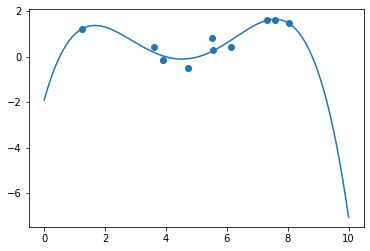

poly1d([-0.02100545,  0.38599269, -2.29185413,  4.81138814, -1.90765678])

In [24]:
model=np.poly1d(np.polyfit(x,y_train,4))
line=np.linspace(0,10,100)
plt.scatter(x,y_train)
plt.plot(line,model(line))
plt.show()
model

In [20]:
x_test=df[df.columns[1]]
x_test=x_test.to_numpy()
x_test

array([5.84, 0.61, 4.23, 6.5 , 0.89, 3.75, 5.73, 3.1 , 6.47, 4.59])

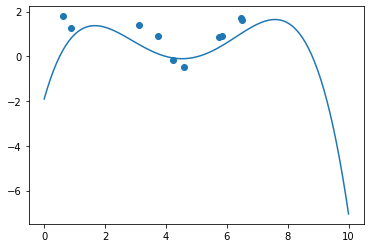

In [25]:
plt.scatter(x_test, y_test)
plt.plot(line,model(line))
plt.show()

In [26]:
import statsmodels.api as sm

In [28]:
from sklearn.linear_model import LinearRegression

In [30]:
sm_x=sm.add_constant(train)
model=sm.OLS(y_train,sm_x).fit()
print(model.summary())
print(model.ssr)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     7.970
Date:                Sun, 02 Oct 2022   Prob (F-statistic):             0.0214
Time:                        02:07:18   Log-Likelihood:               -0.69805
No. Observations:                  10   AIC:                             11.40
Df Residuals:                       5   BIC:                             12.91
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9077      3.500     -0.545      0.6

c:\Users\Jason Wong\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [31]:
line

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

In [32]:
from sklearn.preprocessing import PolynomialFeatures

In [34]:
poly=PolynomialFeatures(degree=4)
x_sk = poly.fit_transform(train)
x_test_sk=poly.fit_transform(test)
model=LinearRegression()
model.fit(x_sk,y_train)
y_predict=model.predict(x_test_sk)
y_predict

array([-1.82374984,  3.43236125, -1.64233317, 21.79478044,  2.99462551,
        0.41660469, -1.14614195, -3.72984196, 18.97122156, -1.35524157])

In [38]:
df_final=pd.DataFrame({'actual':y_test, 'predicted':y_predict})
np.sum(np.square(df_final['predicted'] - df_final['actual']))

752.0902915719191